  ॐ श्री गणेशाय नम:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_excel("housing.xlsx")
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


##### Dataset Description:
| Field | Type    | Description |
| :---: |:---: |:--
| longitude |(Signed numeric - float) | Longitude value for the block in California, USA |
| latitude     |(numeric - float) | Latitude value for the block in California, USA |
| housing_median_age |(numeric-int)| Median age of the house in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_bedrooms |(numeric - float)| Count of the total number of bedrooms in all houses in the block |
| population |(numeric-float) | Count of the total number of bedrooms in all houses in the block |
| households |(numeric - int) | Count of the total number of population in the block |
| median_income |(numeric - float) | Median of the total household income of all the houses in the block |
| ocean_proximity |(numeric - int) |Median of the household prices of all the houses in the use_value block |


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


* There are 20640 nun-null instances & 'total_bedrooms' has only 20433 non-null values (207 values missing)

In [4]:
for item in housing.columns:
    print(item,":", housing[item].nunique())

longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
ocean_proximity : 5
median_house_value : 3842


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* ocean_proximity is a categorical variable

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* **Plot the histogram to check the variation of each feature**

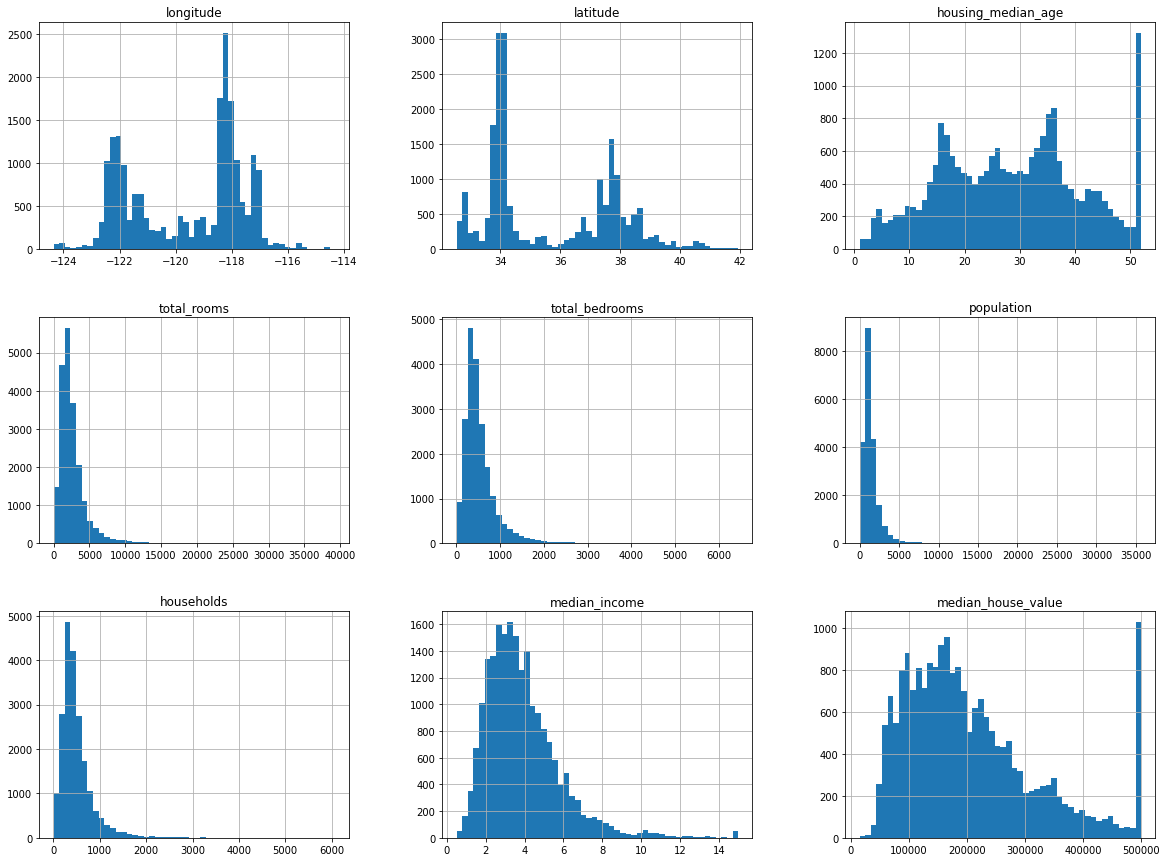

In [7]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

* **median income looks like an imp feature**

<AxesSubplot:>

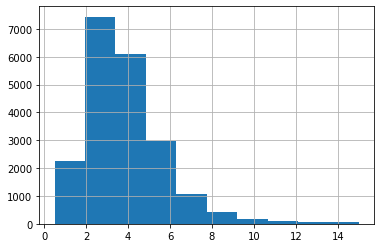

In [8]:
housing['median_income'].hist()

* **Divide the income category into 5 groups to balace the distribution of data**

In [9]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
print(housing['income_cat'].unique())
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)
housing['income_cat'].unique()

[ 6.  5.  4.  3.  2.  1.  8.  7.  9. 11. 10.]


array([5., 4., 3., 2., 1.])

* **Split the data into train & test & check the distribution proportion**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=23)

* StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. Using Stratified Shuffle Split the proportion of distribution of class labels is almost even between train and test dataset. 

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=53)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [15]:
def icatogary_proportions(data):
    return data["income_cat"].value_counts()/len(data)                      

In [16]:
comparing_props = pd.DataFrame({"Overall": icatogary_proportions(housing),
                                "Random sampling(Train Set)" :icatogary_proportions(train_set),
                                "Random sampling(Test Set)" :icatogary_proportions(test_set),
                                "strat. sampling(Train Set)":icatogary_proportions(strat_train_set),
                                "strat. sampling(Test Set)":icatogary_proportions(strat_test_set)
                               }).sort_index()

comparing_props["% random train error"] = 100 * comparing_props["Random sampling(Train Set)"] / comparing_props["Overall"] - 100
comparing_props["% random test error"] = 100 * comparing_props["Random sampling(Test Set)"] / comparing_props["Overall"] - 100
comparing_props["% strat. train error"] = 100 * comparing_props["strat. sampling(Train Set)"] / comparing_props["Overall"] - 100
comparing_props["% strat. test error"] = 100 * comparing_props["strat. sampling(Test Set)"] / comparing_props["Overall"] - 100

comparing_props

,Overall,Random sampling(Train Set),Random sampling(Test Set),strat. sampling(Train Set),strat. sampling(Test Set),% random train error,% random test error,% strat. train error,% strat. test error
1.0,0.039826,0.038760,0.044089,0.039789,0.039971,-2.676399,10.705596,-0.091241,0.364964
2.0,0.318847,0.319889,0.314680,0.318859,0.318798,0.326698,-1.306792,0.003799,-0.015195
3.0,0.350581,0.351926,0.345203,0.350594,0.350533,0.383499,-1.533997,0.003455,-0.013820
4.0,0.176308,0.175690,0.178779,0.176296,0.176357,-0.350371,1.401484,-0.006870,0.027480
5.0,0.114438,0.113735,0.117248,0.114462,0.114341,-0.613887,2.455546,0.021169,-0.084674


**as seen above the proportions stratified sampling has given better proportions.**

**[why stratified?]** : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class

In [17]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [18]:
housing = strat_train_set.copy()

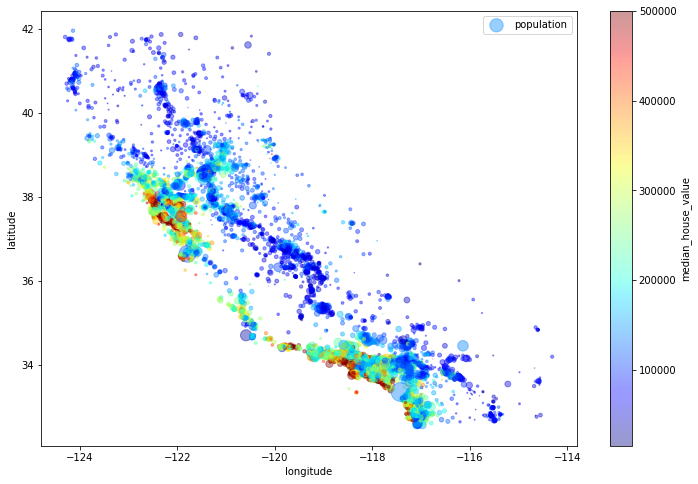

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

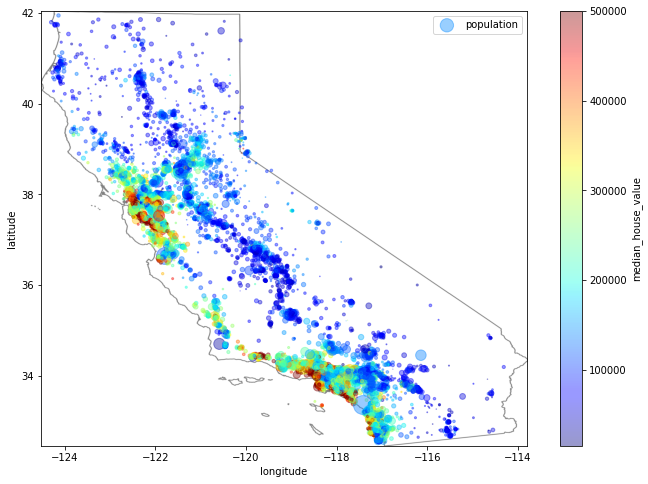

In [20]:
import matplotlib.image as mping

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# Load the png image
california_img= mping.imread("california.png")
plt.imshow(california_img, extent=[-124.53, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.legend()


* **Correlation**

Correlation defines -1(less correlated) and 1(highly correlated)

In [21]:
Correlation = housing.corr()
Correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924177,-0.108571,0.040877,0.066663,0.096814,0.053117,-0.013923,-0.044110
latitude,-0.924177,1.000000,0.011189,-0.032883,-0.064236,-0.106824,-0.069185,-0.080450,-0.145566
housing_median_age,-0.108571,0.011189,1.000000,-0.361303,-0.320676,-0.295214,-0.303272,-0.119543,0.109590
total_rooms,0.040877,-0.032883,-0.361303,1.000000,0.931166,0.854233,0.919604,0.200172,0.136386
total_bedrooms,0.066663,-0.064236,-0.320676,0.931166,1.000000,0.874810,0.979596,-0.005543,0.052798
population,0.096814,-0.106824,-0.295214,0.854233,0.874810,1.000000,0.904875,0.005547,-0.023337
households,0.053117,-0.069185,-0.303272,0.919604,0.979596,0.904875,1.000000,0.015197,0.068493
median_income,-0.013923,-0.080450,-0.119543,0.200172,-0.005543,0.005547,0.015197,1.000000,0.684453
median_house_value,-0.044110,-0.145566,0.109590,0.136386,0.052798,-0.023337,0.068493,0.684453,1.000000


In [22]:
Correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684453
total_rooms           0.136386
housing_median_age    0.109590
households            0.068493
total_bedrooms        0.052798
population           -0.023337
longitude            -0.044110
latitude             -0.145566
Name: median_house_value, dtype: float64

* We can check one by one with other feature also.

**[Note]** we can see from above that median_house_value is highly correlated with median_income, remaining are very less correlated.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

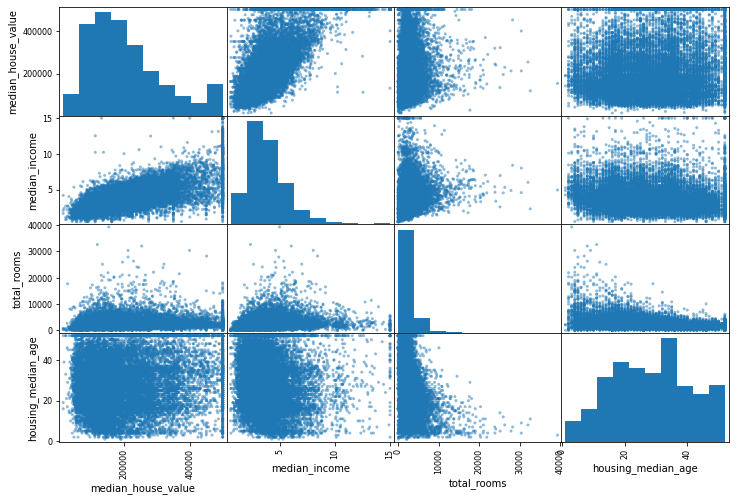

In [23]:
imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

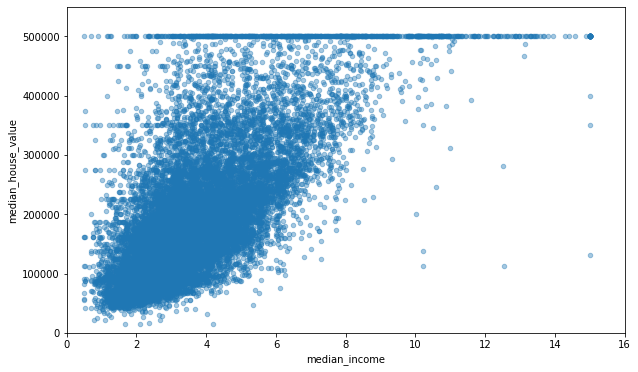

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",figsize=(10,6), alpha=0.4)
plt.axis([0,16,0,550000])

**Feature Engineering**

In [25]:
housing["bedrooms_per_total_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_total_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000,16512.000000,16512.000000,16512.000000,16341.000000,16512.000000,16512.000000
mean,-119.565343,35.625289,28.604833,2639.802204,539.075271,1425.748728,500.307837,3.869101,207192.531613,0.213219,3.087200,5.433521
std,2.002905,2.136777,12.578033,2187.662988,423.385176,1139.767186,383.803724,1.898535,115695.139538,0.058150,11.466887,2.584424
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.792500,33.930000,18.000000,1442.000000,295.000000,784.000000,279.000000,2.566300,120000.000000,0.175448,2.427658,4.434855
50%,-118.490000,34.250000,29.000000,2125.000000,435.000000,1166.000000,409.000000,3.525250,179800.000000,0.203352,2.816651,5.228542
75%,-118.000000,37.710000,37.000000,3156.250000,649.000000,1729.000000,607.000000,4.744475,265300.000000,0.240173,3.279435,6.055125
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


In [27]:
new_correlation = housing.corr()
new_correlation["median_house_value"].sort_values(ascending =False)

median_house_value          1.000000
median_income               0.684453
rooms_per_household         0.147300
total_rooms                 0.136386
housing_median_age          0.109590
households                  0.068493
total_bedrooms              0.052798
population_per_household   -0.022249
population                 -0.023337
longitude                  -0.044110
latitude                   -0.145566
bedrooms_per_total_room    -0.258101
Name: median_house_value, dtype: float64

**[Observation]:** The new 'bedrooms_per_housing' is highly correlated in a reciprocatice way to the 'median_house_value'. So, the houses with lesser bedroom/total_rooms will tend to be more expensive.

(0.0, 16.0, 0.0, 550000.0)

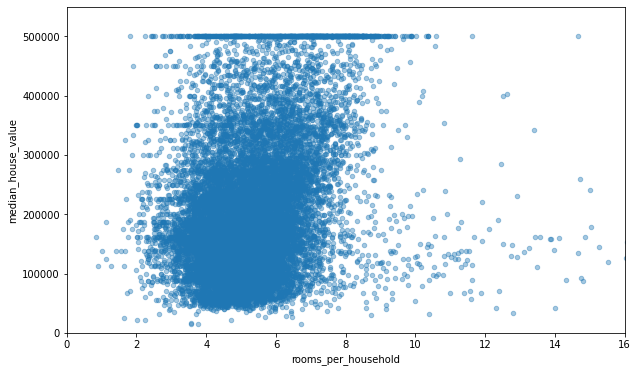

In [28]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",figsize=(10,6), alpha=0.4)
plt.axis([0,16,0,550000])

## Preparing the data

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 11091 to 827
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16341 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [31]:
housing_labels.shape

(16512,)

* **Data Cleansing**

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9149,-118.50,34.46,17,10267,NaN,4956,1483,5.5061,<1H OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN
3354,-120.67,40.50,15,5343,NaN,2503,902,3.5962,INLAND
14015,-117.17,32.75,52,1052,NaN,381,201,3.0726,NEAR OCEAN
7668,-118.08,33.92,38,1335,NaN,1011,269,3.6908,<1H OCEAN


In [33]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9149,-118.50,34.46,17,10267,435.0,4956,1483,5.5061,<1H OCEAN
20372,-118.88,34.17,15,4260,435.0,1701,669,5.1033,<1H OCEAN
3354,-120.67,40.50,15,5343,435.0,2503,902,3.5962,INLAND
14015,-117.17,32.75,52,1052,435.0,381,201,3.0726,NEAR OCEAN
7668,-118.08,33.92,38,1335,435.0,1011,269,3.6908,<1H OCEAN


* Filling NaN value by using simple Imputer

In [34]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
# Imputer Basicly computes across all the attributes. to see this...
print(imputer.statistics_)
print(housing_num.median().values) 
#Both should be same

[-118.49      34.25      29.      2125.       435.      1166.
  409.         3.52525]
[-118.49      34.25      29.      2125.       435.      1166.
  409.         3.52525]


In [37]:
x = imputer.transform(housing_num)
x

array([[-1.1789e+02,  3.3820e+01,  1.8000e+01, ...,  1.8940e+03,
         7.2600e+02,  3.6761e+00],
       [-1.2218e+02,  3.7750e+01,  4.5000e+01, ...,  2.8200e+02,
         8.0000e+01,  4.0469e+00],
       [-1.1555e+02,  3.2790e+01,  2.2000e+01, ...,  6.9200e+02,
         1.4100e+02,  1.2083e+00],
       ...,
       [-1.2069e+02,  3.5520e+01,  2.6000e+01, ...,  1.2910e+03,
         5.2200e+02,  2.9250e+00],
       [-1.2220e+02,  3.7820e+01,  3.9000e+01, ...,  1.2650e+03,
         5.0000e+02,  6.3302e+00],
       [-1.2209e+02,  3.7630e+01,  3.5000e+01, ...,  7.9000e+02,
         2.4300e+02,  4.7019e+00]])

In [38]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.89,33.82,18.0,3197.0,809.0,1894.0,726.0,3.6761
1,-122.18,37.75,45.0,330.0,76.0,282.0,80.0,4.0469
2,-115.55,32.79,22.0,565.0,162.0,692.0,141.0,1.2083
3,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700
4,-122.68,38.43,29.0,488.0,63.0,161.0,62.0,6.0774


In [39]:
housing_tr.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
dtype: bool

* **Handling categorical Values**

In [40]:
housing_cat = housing["ocean_proximity"]
housing_cat.value_counts()

<1H OCEAN     7328
INLAND        5213
NEAR OCEAN    2128
NEAR BAY      1838
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
housing_cat.head()

11091    <1H OCEAN
339       NEAR BAY
2725        INLAND
10326    <1H OCEAN
19179    <1H OCEAN
Name: ocean_proximity, dtype: object

**Convert categorical features into numerical features**

* Using Pandas

In [42]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 0, 0, 2, 2, 0, 0, 2], dtype=int64)

In [43]:
print(housing_categories[:10])

Index(['<1H OCEAN', 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')


* Using Scikit-learn'S OneHotEncoder

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

* Since 1 hot encoder returns a sparse matrix, need to change it to a dense array

In [45]:
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

##### Custom Transformations

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, x, y=None):
        return self # nothing to do here
    
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]

In [47]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [48]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-117.89,33.82,18,3197,809.0,1894,726,3.6761,<1H OCEAN,4.403581,2.608815
1,-122.18,37.75,45,330,76.0,282,80,4.0469,NEAR BAY,4.125,3.525
2,-115.55,32.79,22,565,162.0,692,141,1.2083,INLAND,4.007092,4.907801
3,-117.79,33.8,11,10535,1620.0,4409,1622,6.67,<1H OCEAN,6.495068,2.718249
4,-122.68,38.43,29,488,63.0,161,62,6.0774,<1H OCEAN,7.870968,2.596774


# Setting up Pipeline for all the preprocessings

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ("Imputer", SimpleImputer(strategy = "median")),
                        ("attribs_adder", CombinedAttributesAdder()),
                        ("std_scaler",StandardScaler())
                       ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.83648174, -0.84489101, -0.84314882, ..., -0.39853035,
        -0.04172008,  0.58705544],
       [-1.30547196,  0.99438341,  1.30351567, ..., -0.50632602,
         0.03818062,  0.24427405],
       [ 2.00482013, -1.32694003, -0.52512445, ..., -0.55194987,
         0.1587751 ,  1.09453478],
       ...,
       [-0.56153   , -0.04927612, -0.20710008, ..., -0.05804042,
        -0.05354888, -0.10637729],
       [-1.31545776,  1.02714403,  0.82647912, ...,  0.81509168,
        -0.0485936 , -1.0917645 ],
       [-1.26053587,  0.93822236,  0.50845475, ..., -0.17093374,
         0.01428752, -0.48072128]])

In [50]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, x, y=None):
        return self # do nothing
    
    def transform(self, x, y=None):
        return x[self.attibute_names].values

In [51]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [52]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [53]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.83648174, -0.84489101, -0.84314882, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30547196,  0.99438341,  1.30351567, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.00482013, -1.32694003, -0.52512445, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56153   , -0.04927612, -0.20710008, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31545776,  1.02714403,  0.82647912, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26053587,  0.93822236,  0.50845475, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),
                                                ('cat_pipeline', cat_pipeline)
                                               ])

In [55]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.83648174, -0.84489101, -0.84314882, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30547196,  0.99438341,  1.30351567, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.00482013, -1.32694003, -0.52512445, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56153   , -0.04927612, -0.20710008, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31545776,  1.02714403,  0.82647912, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26053587,  0.93822236,  0.50845475, ...,  0.        ,
         1.        ,  0.        ]])

# Selecting & Training Models

## LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression
linReg= LinearRegression()

linReg.fit(housing_prepared, housing_labels)

LinearRegression()

In [57]:
# Trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data
some_data_prepared = full_pipeline.transform(some_data)

In [58]:
print("Prediction:", linReg.predict(some_data_prepared))
print("Actual labels:", list(some_labels))

Prediction: [216712.36260915 245902.35955743  21904.60172303 325303.26458222
 305213.18401426]
Actual labels: [140500, 80700, 53600, 283200, 334400]


In [59]:
from sklearn.metrics import mean_squared_error

housing_predictions = linReg.predict(housing_prepared)

* Root Mean Squared Error

In [60]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse =np.sqrt(lin_mse)
lin_rmse

68920.51111499335

* Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linReg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_scores)

### Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg =DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [63]:
housing_predictions = tree_reg.predict(housing_prepared)

* Root Mean Squared Error

In [64]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linReg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_scores)

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv= 10, scoring = "neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

### Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfReg= RandomForestRegressor(random_state=29)
rfReg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=29)

In [68]:
housing_pred = rfReg.predict(housing_prepared)

* Root Mean Squared Error

In [70]:
rf_mse = mean_squared_error(housing_labels, housing_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18687.087616287292

* Cross Validation

In [71]:
rf_scores=cross_val_score(rfReg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")
rf_rmse_scores = np.sqrt(-rf_scores)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("mean:", scores.mean())
    print("std deviation:", scores.std())

In [73]:
display_scores(lin_rmse_scores)

Scores: [70285.78924561 68706.36407122 66095.85188932 68352.24827685
 67578.74509987 71334.42116612 70587.71563896 66621.60669599
 70933.52275759 71299.46984956]
mean: 69179.57346910883
std deviation: 1869.3267090626607


In [74]:
display_scores(tree_rmse_scores)

Scores: [74986.5716247  67058.6201224  69862.07198415 72624.99384166
 68679.01093752 70858.42624726 72193.67620163 70520.71691459
 67689.19383747 72093.8244056 ]
mean: 70656.7106116974
std deviation: 2310.924826859536


In [75]:
display_scores(rf_rmse_scores)

Scores: [52061.53052562 50664.67779833 48322.61503159 49307.24214873
 50056.97090996 53802.86375749 51773.65587028 48524.35041403
 47657.78165543 52367.813898  ]
mean: 50453.95020094574
std deviation: 1918.4753145556808


## Fine Tuning Model

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [ 3, 10, 30],'max_features':[2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
             ]
rf_reg = RandomForestRegressor()
grid_search =GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [77]:
#To get the best combinations of hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [78]:
# To get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [79]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

64865.50452363314 {'max_features': 2, 'n_estimators': 3}
55276.52007938155 {'max_features': 2, 'n_estimators': 10}
52914.85545252942 {'max_features': 2, 'n_estimators': 30}
60448.843365300265 {'max_features': 4, 'n_estimators': 3}
53006.645190023664 {'max_features': 4, 'n_estimators': 10}
50859.66608828291 {'max_features': 4, 'n_estimators': 30}
59459.9258461104 {'max_features': 6, 'n_estimators': 3}
52143.36226855261 {'max_features': 6, 'n_estimators': 10}
49826.11233942648 {'max_features': 6, 'n_estimators': 30}
58898.506527266785 {'max_features': 8, 'n_estimators': 3}
51976.74072610912 {'max_features': 8, 'n_estimators': 10}
50404.300282710465 {'max_features': 8, 'n_estimators': 30}
63150.01365804569 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53776.34183696156 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60535.75647248561 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52396.670693227345 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [80]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066609,0.005311,0.003126,0.006252,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.252652e+09,-4.059363e+09,-4.457030e+09,-3.906427e+09,-4.362198e+09,-4.207534e+09,2.004119e+08,18
1,0.210698,0.009055,0.012053,0.006416,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.031763e+09,-2.933215e+09,-3.193055e+09,-2.904267e+09,-3.215169e+09,-3.055494e+09,1.286891e+08,11
2,0.617622,0.003299,0.026022,0.008612,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.770279e+09,-2.698602e+09,-2.938593e+09,-2.789385e+09,-2.803050e+09,-2.799982e+09,7.809562e+07,8
3,0.102776,0.008819,0.000000,0.000000,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.633966e+09,-3.339423e+09,-3.826776e+09,-3.893337e+09,-3.576811e+09,-3.654063e+09,1.961896e+08,15
4,0.350835,0.026547,0.013210,0.006653,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.751253e+09,-2.653345e+09,-2.986438e+09,-2.822592e+09,-2.834894e+09,-2.809704e+09,1.094534e+08,9
5,1.026033,0.026887,0.032211,0.001910,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.605104e+09,-2.423748e+09,-2.780277e+09,-2.521599e+09,-2.602800e+09,-2.586706e+09,1.173556e+08,3
6,0.136822,0.010606,0.003139,0.006278,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.806609e+09,-3.245472e+09,-3.780281e+09,-3.294714e+09,-3.550338e+09,-3.535483e+09,2.348327e+08,14
7,0.463884,0.009797,0.012510,0.006255,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.905545e+09,-2.528785e+09,-2.786864e+09,-2.686210e+09,-2.687247e+09,-2.718930e+09,1.246352e+08,5
8,1.383654,0.017456,0.029123,0.006510,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.475009e+09,-2.331683e+09,-2.656282e+09,-2.422505e+09,-2.527728e+09,-2.482641e+09,1.083023e+08,1
9,0.176392,0.003511,0.003275,0.001659,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.716815e+09,-3.252948e+09,-3.430208e+09,-3.500961e+09,-3.444238e+09,-3.469034e+09,1.491510e+08,13


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_disttibs={
    "n_estimators" : randint(low = 1, high = 200),
    "max_features" : randint(low =1, high =8)
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_disttibs, n_iter = 10, cv =5, 
                                scoring = "neg_mean_squared_error", random_state=29)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000279BD925420>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000279BD926BF0>},
                   random_state=29, scoring='neg_mean_squared_error')

In [82]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49362.970855003194 {'max_features': 6, 'n_estimators': 116}
50137.32804102389 {'max_features': 5, 'n_estimators': 35}
54406.211771359995 {'max_features': 1, 'n_estimators': 97}
51561.82997283744 {'max_features': 2, 'n_estimators': 114}
54408.82239392794 {'max_features': 1, 'n_estimators': 98}
49603.90922086844 {'max_features': 7, 'n_estimators': 95}
54236.75508197238 {'max_features': 1, 'n_estimators': 156}
49359.95499192285 {'max_features': 6, 'n_estimators': 149}
49453.019452317574 {'max_features': 7, 'n_estimators': 152}
54243.864450754016 {'max_features': 1, 'n_estimators': 165}


In [83]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.22591149e-02, 6.80859518e-02, 4.47585432e-02, 1.78946159e-02,
       1.74615683e-02, 1.88562755e-02, 1.77730839e-02, 2.73062043e-01,
       7.42544537e-02, 1.12546756e-01, 8.93899605e-02, 8.09020950e-03,
       1.77431622e-01, 1.51962845e-04, 2.11289413e-03, 5.87094512e-03])

In [84]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.27306204293652847, 'median_income'),
 (0.1774316222421776, 'INLAND'),
 (0.11254675568601483, 'pop_per_hhold'),
 (0.0893899604648551, 'bedrooms_per_room'),
 (0.07425445370397785, 'rooms_per_hhold'),
 (0.0722591148502895, 'longitude'),
 (0.06808595175594448, 'latitude'),
 (0.04475854318426972, 'housing_median_age'),
 (0.018856275496720663, 'population'),
 (0.017894615914332817, 'total_rooms'),
 (0.01777308391526453, 'households'),
 (0.017461568254442776, 'total_bedrooms'),
 (0.00809020950048791, '<1H OCEAN'),
 (0.005870945116238187, 'NEAR OCEAN'),
 (0.0021128941335173306, 'NEAR BAY'),
 (0.00015196284493819857, 'ISLAND')]

In [85]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
pd.DataFrame(grid_search.cv_results_).to_excel("California Housing Price Predicted.xlsx")